In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
#We'll subset this data to only Data Analysts so we have more meaningful insights.
df = df[df['job_title_short'] == 'Data Analyst'].copy()

In [3]:
# Explode the 'job_skills' into individual rows
df_exploded = df.explode('job_skills')
#for each of the skills exploded we need to aggregate using count by the median salary 
skill_stats = df_exploded.groupby('job_skills').agg(#since there multple functions we use agg 
    median_salary=('salary_year_avg', 'median'),#using a dictionary to find key and values of median salary
    skill_count=('job_skills', 'count')#tuple of two variables using job skills as a count 
)
# Limit to the top 10 skills by highest salary
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)#highest count at top
# The purpose of the format is so we can use median salary as y-axis and count as x-axis on the scatter plot
skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.0,92428
excel,84479.0,66860
python,98500.0,57190
tableau,95000.0,46455
power bi,90000.0,39380
r,92527.5,29996
sas,90000.0,27998
powerpoint,85000.0,13822
word,80000.0,13562


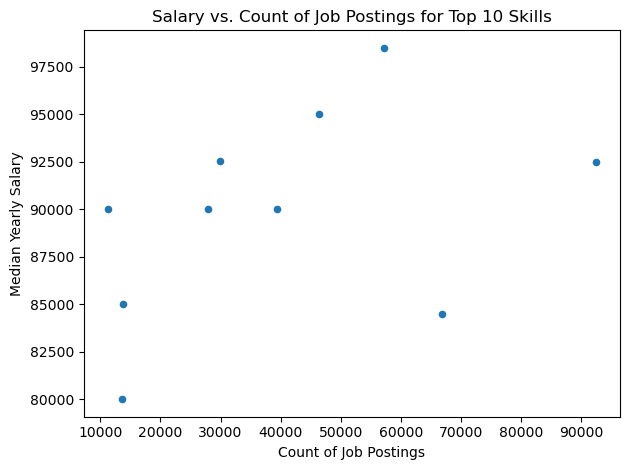

In [4]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary') # provide x and y value
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

# Adding the names of job_skills

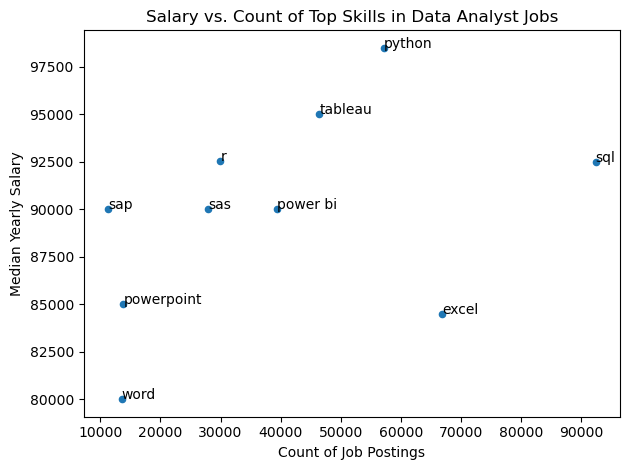

In [5]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# plt.text() function to label the points
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
#aboves we iterate with for loop index enumarating through skill stats specifically the index
#providing skill count as x axis and the specific value using iloc and txt
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Top Skills in Data Analyst Jobs')
plt.tight_layout()
plt.show()